## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

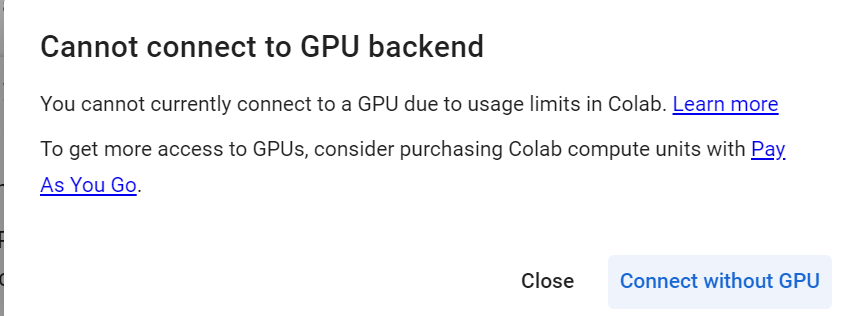

## **Installing and Importing Necessary Libraries**

In [ ]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers gensim transformers tqdm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 854.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 14.8 MB/s eta 0:00:00


In [ ]:
# As referenced to Product Reviews Sentiment Analysis case study provided by Great Learning and University of Texas at Austin
# To manipulate and analyze data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# To used time-related functions
import time

# To parse JSON data
import json

# To build, tune, and evaluate ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# To load/create word embeddings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To ignore unnecessary warnings
import warnings

## **Loading the dataset**

In [ ]:
# Loads Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reads the csv file from Google Drive
stock = pd.read_csv("/content/drive/MyDrive/stock_news.csv")

In [ ]:
# Creates a copy of the data
data = stock.copy()

## **Data Overview**

In [ ]:
# Shows the first 5 rows of the data
data.head(5)

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


In [ ]:
# Shows the last 5 rows of the data
data.tail(5)

,Date,News,Open,High,Low,Close,Volume,Label
344,2019-04-30,"Media mogul Oprah Winfrey, known for influenc...",50.764999,50.849998,49.7775,48.70879,186139600,-1
345,2019-04-30,"European shares fell on Tuesday, with banks u...",50.764999,50.849998,49.7775,48.70879,186139600,-1
346,2019-04-30,This article reports that the S&P 500 reached...,50.764999,50.849998,49.7775,48.70879,186139600,-1
347,2019-04-30,The Federal Reserve is anticipated to keep in...,50.764999,50.849998,49.7775,48.70879,186139600,-1
348,2019-04-30,"In the first quarter, South Korea's Samsung E...",50.764999,50.849998,49.7775,48.70879,186139600,0


In [ ]:
# Shows the shape of the data
data.shape

(349, 8)

* There are 349 rows and 8 columns

In [ ]:
# Shows the different datatypes in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    349 non-null    object 
 1   News    349 non-null    object 
 2   Open    349 non-null    float64
 3   High    349 non-null    float64
 4   Low     349 non-null    float64
 5   Close   349 non-null    float64
 6   Volume  349 non-null    int64  
 7   Label   349 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ KB


* Data and News have an object datatype

In [ ]:
# Shows the number of missing values in the data
data.isnull().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


* There are no missing values in the dataset

In [ ]:
# Shows the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,349.0,4.622923e+01,6.442817e+00,3.756750e+01,4.174000e+01,4.597500e+01,5.070750e+01,6.681750e+01
High,349.0,4.670046e+01,6.507321e+00,3.781750e+01,4.224500e+01,4.602500e+01,5.085000e+01,6.706250e+01
Low,349.0,4.574539e+01,6.391976e+00,3.730500e+01,4.148250e+01,4.564000e+01,4.977750e+01,6.586250e+01
Close,349.0,4.492632e+01,6.398338e+00,3.625413e+01,4.024691e+01,4.459692e+01,4.911079e+01,6.480523e+01
Volume,349.0,1.289482e+08,4.317031e+07,4.544800e+07,1.032720e+08,1.156272e+08,1.511252e+08,2.444392e+08
Label,349.0,-5.444126e-02,7.151192e-01,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [ ]:
# Convert the DataFrame's column names into a list
data.columns.tolist()

['Date', 'News', 'Open', 'High', 'Low', 'Close', 'Volume', 'Label']

In [ ]:
# Checks for duplcate values in the dataset
data.duplicated().sum()

0

* There are no duplicate values in the dataset

In [ ]:
# Checks for unique values in the dataset
data.nunique()

,0
Date,71
News,349
Open,70
High,70
Low,71
Close,71
Volume,71
Label,3


* There are 349 unique values for News

In [ ]:
# Convert the "Date" column to datetime format and count the occurrences of each year in the "Date" column
data["Date"] = pd.to_datetime(data["Date"])
data["Date"].dt.year.value_counts()

,count
Date,
2019,349


## **Exploratory Data Analysis**

### Univariate Analysis

* Distribution of individual variables
* Compute and check the distribution of the length of news content

<ipython-input-16-25bf6c416b33>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Label", stat="percent", palette='tab10')


<Axes: xlabel='Label', ylabel='percent'>

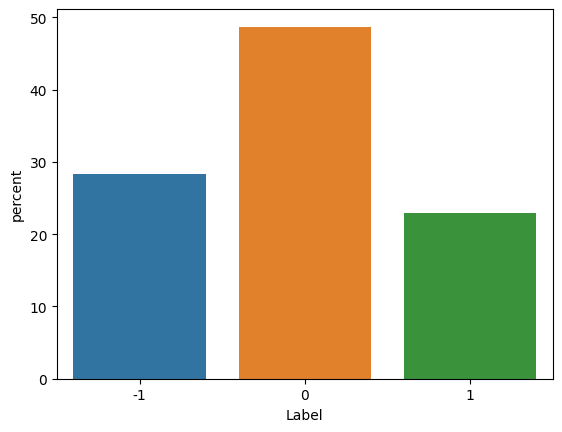

In [ ]:
sns.countplot(data=data, x="Label", stat="percent", palette='tab10')

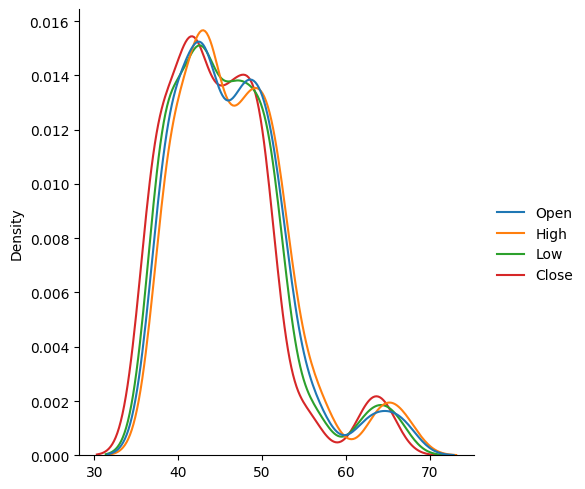

In [ ]:
sns.displot(data=data[["Open","High","Low","Close"]], kind="kde", palette="tab10")

<Axes: xlabel='Volume', ylabel='Count'>

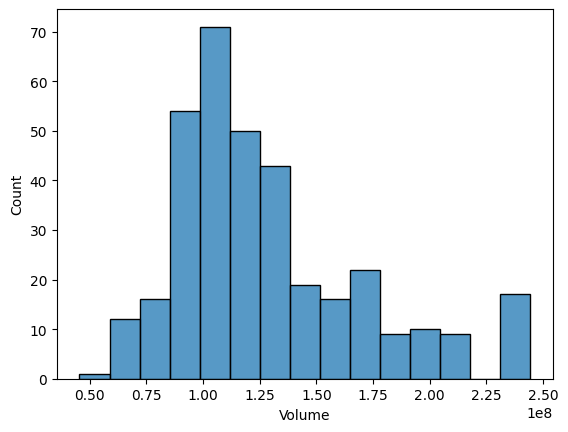

In [ ]:
sns.histplot(data, x='Volume')

In [ ]:
#Calculating the total number of words present in the news content.
stock['news_len'] = stock['News'].apply(lambda x: len(x.split(' ')))


stock['news_len'].describe().T

,news_len
count,349.000000
mean,49.312321
std,5.727770
min,19.000000
25%,46.000000
50%,50.000000
75%,53.000000
max,61.000000


<ipython-input-20-ec92c30bb2ba>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x="Label", order=['Neutral', 'Positive', 'Negative'], palette=custom_palette)


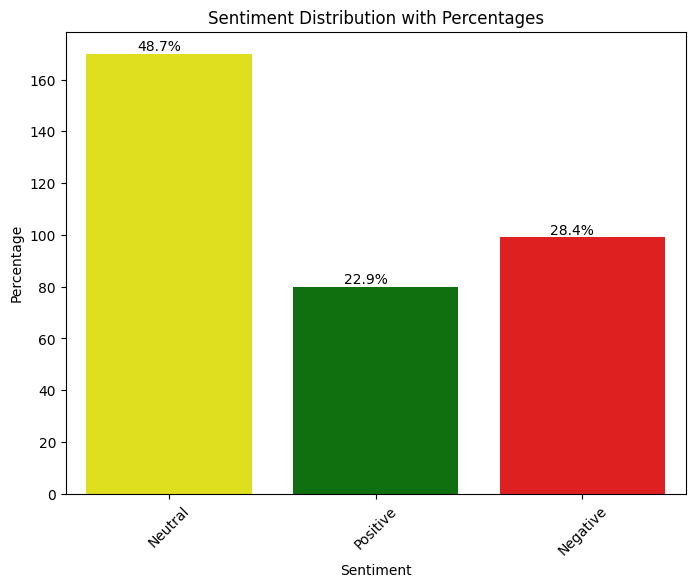

In [ ]:
# As referenced to Stock Market News Sentiment Analysis and Summarization by Rob Barker
data = data.copy()
data = pd.DataFrame(data)

# Create a mapping for the sentiment labels
sentiment_mapping = {0: 'Neutral', 1: 'Positive', -1: 'Negative'}

# Map the sentiment labels to the DataFrame
data['Label'] = data['Label'].map(sentiment_mapping)

# Define a custom color palette
custom_palette = {'Neutral': 'yellow', 'Positive': 'green', 'Negative': 'red'}

# Create the countplot with custom labels and colors
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x="Label", order=['Neutral', 'Positive', 'Negative'], palette=custom_palette)

# Add percentage values to the countplot
total = len(data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Set plot labels and title
ax.set_xlabel('Sentiment')
ax.set_ylabel('Percentage')
ax.set_title('Sentiment Distribution with Percentages')

# Show the plot
plt.show()

* 48% of sentiments are neutral
* 22.9% of sentiments are positive
* 28.4% of sentiments are negative

### Bivariate Analysis

* Correlation
* Sentiment Polarity vs Price
* Date vs Price

**Note**: The above points are listed to provide guidance on how to approach bivariate analysis. Analysis has to be done beyond the above listed points to get maximum scores.

In [ ]:
# As referenced to Stock Market News Sentiment Analysis and Summarization by Rob Barker
# Calculating the total number of words present in the news content.
data['news_len'] = data['News'].apply(lambda x: len(x.split(' ')))

# Displaying the statistics of the news length.
data['news_len'].describe().T

,news_len
count,349.000000
mean,49.312321
std,5.727770
min,19.000000
25%,46.000000
50%,50.000000
75%,53.000000
max,61.000000


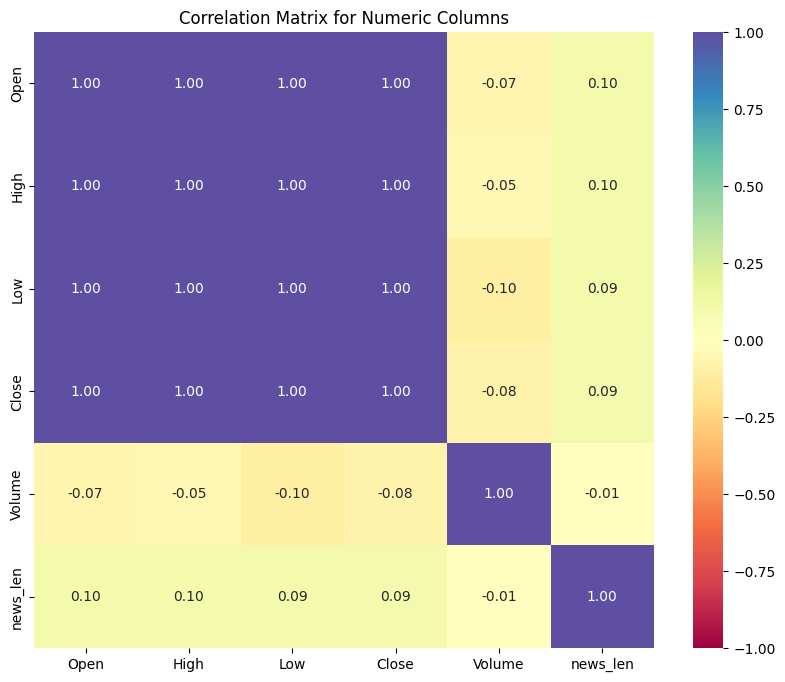

In [ ]:
# As referenced to Stock Market News Sentiment Analysis and Summarization by Rob Barker
# Select only the numeric columns from the stocknews_df DataFrame
numeric_columns = data.select_dtypes(include='number')

# Plot the correlation matrix fir the numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(
    numeric_columns.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)

# Set plot labels and title
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

* There is no strong correlation between the numerical columns of the datatset


**Analyzing the Relationship Between Sentiment Labels and Stock Prices (Open, High, Low, Close)**

This visualization examines how stock prices—namely Open, High, Low, and Close—vary across different sentiment labels ("Label"). By leveraging boxplots, we can observe the distribution, central tendencies, and variability of each price category within Neutral, Positive, and Negative sentiment groups. This analysis helps uncover potential correlations between market sentiment and price behavior.

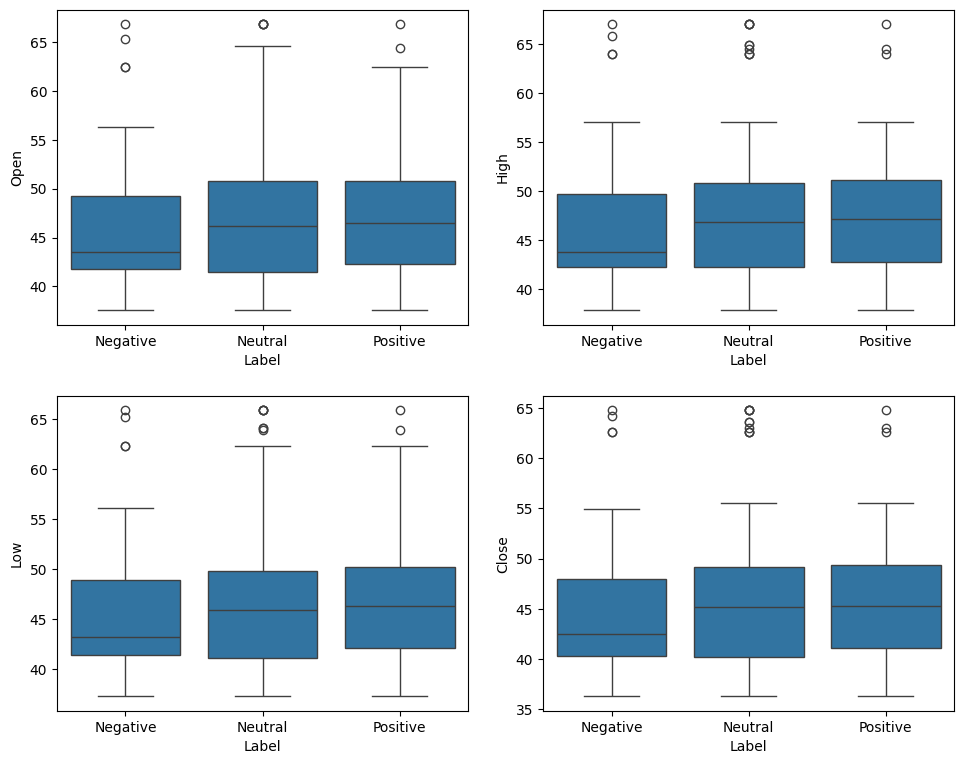

In [ ]:
# As referenced to Stock Market News and Summarization by Rob Barker
# Create a 2x2 grid of boxplots to visualize the distribution of 'Open', 'High', 'Low', and 'Close' stock values for each sentiment label
plt.figure(figsize=(10, 8))

for i, variable in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=data, x="Label", y=variable)
    plt.tight_layout(pad=2)

plt.show()

* All boxplots have outliers regardless of sentiments

**Exploring the Relationship Between Sentiment Labels and Stock Trading Volume**

This visualization provides insights into how stock trading volume ("Volume") varies across different sentiment labels ("Label"). By using a boxplot, we can identify patterns, outliers, and the overall distribution of trading volume for each sentiment category (e.g., Neutral, Positive, Negative). This helps us understand whether market sentiment impacts trading activity.

<Axes: xlabel='Label', ylabel='Volume'>

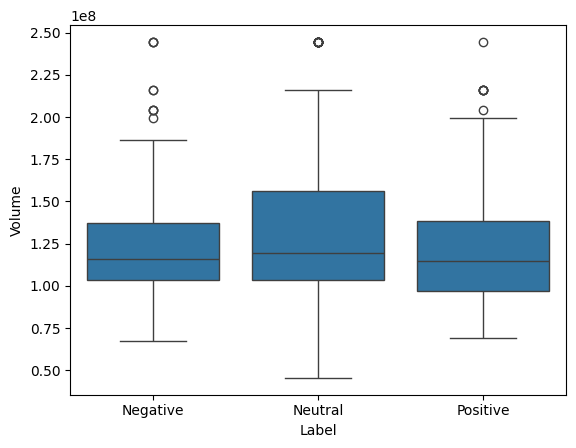

In [ ]:
# As referenced to Stock Market News and Summarization by Rob Barker
# Create a boxplot to analyze the distribution of stock trading volume ("Volume") across different sentiment labels ("Label")
sns.boxplot(data=data, x="Label", y="Volume")

* The boxplot for negative sentiments has the most outliers.
* The median is around the same for all sentiments

**Analyzing the Relationship Between Date and Stock Prices (Open, High, Low, Close)**

This visualization explores how stock prices—Open, High, Low, and Close—fluctuate over time. By plotting prices against the "Date," we can identify trends, seasonal patterns, or anomalies in the stock market. This analysis provides valuable insights into how stock prices evolve over time and helps in understanding historical market behavior.

In [ ]:
# As referenced to Stock Market News and Summarization by Rob Barker
# Group the 'data' DataFrame by the 'Date' column and calculate the mean for each specified column ('Open', 'High', 'Low', 'Close', 'Volume').
# This aggregates the stock data to a daily level, summarizing the average values for each day.
daily_stock = data.groupby('Date').agg(
    {
        'Open': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Close': 'mean',
        'Volume': 'mean',
    }
).reset_index()

# Set the 'Date' column as the index of the 'daily_stock' DataFrame for easier time-based operations and analysis.
daily_stock.set_index('Date', inplace=True)

# Display the first 5 rows of the 'daily_stock' DataFrame to verify the result.
daily_stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,41.740002,42.244999,41.482498,40.246914,130672400.0
2019-01-03,43.570000,43.787498,43.222500,42.470604,103544800.0
2019-01-04,47.910000,47.919998,47.095001,46.419842,111448000.0
2019-01-07,50.792500,51.122501,50.162498,49.110790,109012000.0
2019-01-08,53.474998,54.507500,51.685001,50.787209,216071600.0


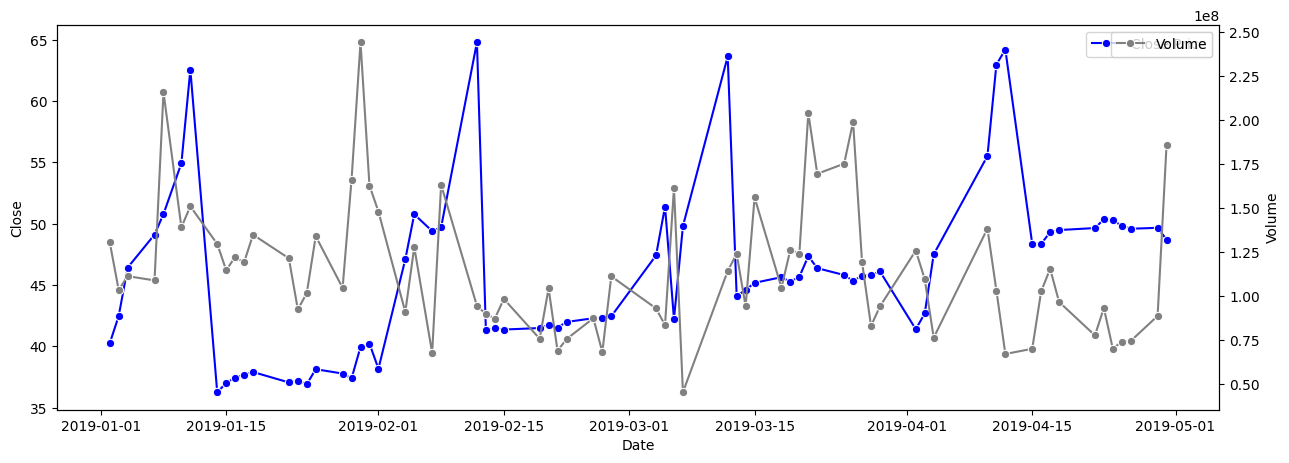

In [ ]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15,5))

# Lineplot on primary y-axis
sns.lineplot(data=daily_stock.reset_index(), x='Date', y='Close', ax=ax1, color='blue', marker='o', label='Close Price')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Lineplot on secondary y-axis
sns.lineplot(data=daily_stock.reset_index(), x='Date', y='Volume', ax=ax2, color='gray', marker='o', label='Volume')

ax1.legend(bbox_to_anchor=(1,1))

* The Close Price experienced a lot of fluctuations in the first five months of 2019.

## **Data Preprocessing**

In [ ]:
data['Date'].describe()

,Date
count,349
mean,2019-02-16 16:05:30.085959936
min,2019-01-02 00:00:00
25%,2019-01-14 00:00:00
50%,2019-02-05 00:00:00
75%,2019-03-22 00:00:00
max,2019-04-30 00:00:00


In [ ]:
X_train = data[(data['Date'] < '2019-04-01')].reset_index()
X_val = data[(data['Date'] >= '2019-04-01') & (stock['Date'] < '2019-04-16')].reset_index()
X_test = data[data['Date'] >= '2019-04-16'].reset_index()

In [ ]:
y_train = X_train["Label"].copy()
y_val = X_val["Label"].copy()
y_test = X_test["Label"].copy()

In [ ]:
print("Train data shape",X_train.shape)
print("Validation data shape",X_val.shape)
print("Test data shape ",X_test.shape)

print("Train label shape",y_train.shape)
print("Validation label shape",y_val.shape)
print("Test label shape ",y_test.shape)

Train data shape (286, 10)
Validation data shape (21, 10)
Test data shape  (42, 10)
Train label shape (286,)
Validation label shape (21,)
Test label shape  (42,)


## **Word Embeddings**

###**Word2Vec**

In [ ]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in stock['News'].values]

In [ ]:
# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 4682


In [ ]:
# Checking the word embedding of a random word
word = "stock"
model_W2V.wv[word]

array([ 0.00297263,  0.0435502 ,  0.00642138,  0.02337717, -0.00281329,
       -0.04987873,  0.0353073 ,  0.08404175,  0.00972416, -0.0152168 ,
        0.01207733, -0.02261907,  0.00124544,  0.01183947, -0.02903468,
       -0.02565844,  0.02216726, -0.01275774, -0.00241284, -0.01305074,
       -0.02785655,  0.00338105,  0.03641209,  0.00825785,  0.01438697,
        0.00580366, -0.04516159,  0.00622981, -0.01774666, -0.03485965,
        0.0133604 , -0.02198509,  0.00257976, -0.00274091, -0.00503814,
        0.01652551,  0.01741696, -0.0385428 ,  0.00170024, -0.01067205,
       -0.01622398, -0.00130852, -0.00263628, -0.02552708,  0.01539377,
        0.03898353, -0.00035776,  0.01052353, -0.0016734 ,  0.02719129,
        0.01955339,  0.00430939, -0.01574159,  0.01271971, -0.01070452,
        0.02691329,  0.01358578,  0.00361972,  0.01567306, -0.00413194,
       -0.0073287 , -0.01615121,  0.00040808,  0.01128572,  0.0057933 ,
        0.01419054,  0.00115054,  0.01539097, -0.02185849, -0.00

In [ ]:
# Checking the word embedding of a random word
word = "economy"
model_W2V.wv[word]

array([ 2.39397376e-03,  6.48180163e-03,  1.66961254e-04,  3.57687916e-03,
       -2.43846397e-03, -8.66796635e-03,  8.70584790e-03,  1.59212276e-02,
        4.76648507e-04, -1.43167668e-03,  2.56033242e-03, -4.67608962e-03,
        7.42473756e-04,  2.01643212e-03, -4.89996746e-03, -3.48272873e-03,
        2.54850555e-03, -3.43108177e-03, -6.34219963e-04, -3.86075838e-03,
       -1.47833012e-03,  1.76370365e-03,  5.22336876e-03,  2.46848189e-03,
        4.59684292e-03,  1.57731515e-03, -4.88938298e-03, -1.33050338e-03,
       -2.45876936e-03, -5.77906054e-03,  2.92115449e-03, -2.20579351e-03,
        3.02803679e-03, -1.68455648e-03,  1.19509597e-04,  3.54842562e-03,
        1.58892793e-03, -3.15063749e-03,  5.39214176e-04, -1.86130742e-03,
       -4.80306754e-03,  5.46416268e-04,  1.22333330e-03, -5.15834149e-03,
       -1.07758690e-03,  6.77750353e-03, -1.76392507e-03,  5.06008370e-03,
       -2.83138896e-03,  5.99321770e-03,  6.52995717e-04, -2.36060194e-04,
       -2.24104850e-03,  

In [ ]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

In [ ]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_wv = pd.DataFrame(X_train["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_wv = pd.DataFrame(X_val["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_wv = pd.DataFrame(X_test["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  1.5414927005767822


In [ ]:
print(X_train_wv.shape, X_val_wv.shape, X_test_wv.shape)

(286, 300) (21, 300) (42, 300)


###**GloVe**

In [ ]:
# As referenced to Stock Market News Sentiment Analysis and Summarization by Rob Barker
filename = "/content/drive/MyDrive/glove.6B.100d.txt.word2vec"
# Load the converted Word2Vec model
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
# As referenced to Stock Market News Sentiment Analysis and Summarization by Rob Barker
# Checks the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


In [ ]:
# As referenced to Stock Market News Sentiment Analysis and Summarization by Rob Barker
# Checks the word embedding of a random word
word = "stock"
glove_model[word]

array([ 8.6341e-01,  6.9648e-01,  4.5794e-02, -9.5708e-03, -2.5498e-01,
       -7.4666e-01, -2.2086e-01, -4.4615e-01, -1.0423e-01, -9.9931e-01,
        7.2550e-02,  4.5049e-01, -5.9912e-02, -5.7837e-01, -4.6540e-01,
        4.3429e-02, -5.0570e-01, -1.5442e-01,  9.8250e-01, -8.1571e-02,
        2.6523e-01, -2.3734e-01,  9.7675e-02,  5.8588e-01, -1.2948e-01,
       -6.8956e-01, -1.2811e-01, -5.2265e-02, -6.7719e-01,  3.0190e-02,
        1.8058e-01,  8.6121e-01, -8.3206e-01, -5.6887e-02, -2.9578e-01,
        4.7180e-01,  1.2811e+00, -2.5228e-01,  4.9557e-02, -7.2455e-01,
        6.6758e-01, -1.1091e+00, -2.0493e-01, -5.8669e-01, -2.5375e-03,
        8.2777e-01, -4.9102e-01, -2.6475e-01,  4.3015e-01, -2.0516e+00,
       -3.3208e-01,  5.1845e-02,  5.2646e-01,  8.7452e-01, -9.0237e-01,
       -1.7366e+00, -3.4727e-01,  1.6590e-01,  2.7727e+00,  6.5756e-02,
       -4.0363e-01,  3.8252e-01, -3.0787e-01,  5.9202e-01,  1.3468e-01,
       -3.3851e-01,  3.3646e-01,  2.0950e-01,  8.5905e-01,  5.18

In [ ]:
# Checking the word embedding of a random word
word = "economy"
glove_model[word]

array([-0.19382  ,  1.017    ,  1.076    ,  0.02954  , -0.39192  ,
       -1.3891   , -0.87873  , -0.63162  ,  0.9643   , -0.43035  ,
       -0.34868  ,  0.22736  , -0.40296  ,  0.15641  , -0.16813  ,
       -0.15343  , -0.15799  , -0.27612  ,  0.18088  , -0.28386  ,
        0.49847  ,  0.29864  ,  0.32353  ,  0.18108  , -0.59623  ,
       -0.54165  , -0.70019  , -0.64956  , -0.69063  ,  0.18084  ,
       -0.38581  ,  0.56086  , -0.40313  , -0.38777  , -0.70615  ,
        0.20657  ,  0.34171  , -0.23393  , -0.35882  , -0.2201   ,
       -0.76182  , -1.2047   ,  0.4339   ,  1.1656   ,  0.1836   ,
       -0.21601  ,  0.93198  , -0.059616 , -0.11624  , -1.3259   ,
       -0.79772  , -0.0074957, -0.0889   ,  1.4749   ,  0.31157  ,
       -2.2952   , -0.058351 ,  0.39353  ,  1.4983   ,  0.74023  ,
       -0.20109  ,  0.098124 , -0.73081  , -0.32294  ,  0.16703  ,
        0.87431  , -0.041624 , -0.51022  ,  1.0737   , -0.4257   ,
        1.0581   ,  0.19859  , -0.60087  , -0.33906  ,  0.6024

In [ ]:
# Retrieving the words present in the GloVe model's vocabulary
glove_words = glove_model.index_to_key

# Creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [ ]:
vec_size = 100

In [ ]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_gl = pd.DataFrame(X_train["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)]) #Complete the code to apply GloVe on 'News' column
X_val_gl = pd.DataFrame(X_val["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)]) #Complete the code to apply GloVe on 'News' column
X_test_gl = pd.DataFrame(X_test["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)]) #Complete the code to apply GloVe on 'News' column

end = time.time()
print('Time taken ', (end-start))

Time taken  35.811851978302


In [ ]:
print(X_train_gl.shape, X_val_gl.shape, X_test_gl.shape)

(286, 100) (21, 100) (42, 100)


###**Sentence Transformer**

In [ ]:
# As referenced to Stock Market News Sentiment Analysis and Summarization by Rob Barker
# Defines the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# As referenced to Stock Market News Sentiment Analysis and Summarization by Rob Barker
# Encoding the dataset
start = time.time()

# Apply Sentence Transformer on 'News' column
X_train_st = model.encode(X_train["News"].values, show_progress_bar=True, device=device)

# Apply Sentence Transformer on 'News' column
X_val_st = model.encode(X_val["News"].values, show_progress_bar=True, device=device)

# Apply Sentence Transformer on 'News' column
X_test_st = model.encode(X_test["News"].values, show_progress_bar=True, device=device)

end = time.time()
print("Time taken ",(end-start))

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Time taken  14.173768758773804


In [ ]:
# As referenced to Stock Market News Sentiment Analysis and Summarization by Rob Barker
# Print the shapes of the final dataframes
print(X_train_st.shape, X_val_st.shape, X_test_st.shape)

(286, 384) (21, 384) (42, 384)


## **Sentiment Analysis**

###**Utility Functions**

In [ ]:
# As referenced to Stock Market News Sentiment Analysis and Summarization by Rob Barker
def plot_confusion_matrix(model, predictors, target):
    """
    Plot a confusion matrix to visualize the performance of a classification model.

    Parameters:
    actual (array-like): The true labels.
    predicted (array-like): The predicted labels from the model.

    Returns:
    None: Displays the confusion matrix plot.
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    cm = confusion_matrix(target, pred)  # Compute the confusion matrix.

    plt.figure(figsize=(5, 4))  # Create a new figure with a specified size.
    label_list = [0, 1,-1]  # Define the labels for the confusion matrix.
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
    # Plot the confusion matrix using a heatmap with annotations.

    plt.ylabel('Actual')  # Label for the y-axis.
    plt.xlabel('Predicted')  # Label for the x-axis.
    plt.title('Confusion Matrix')  # Title of the plot.
    plt.show()  # Display the plot.

In [ ]:
# As referenced to Stock Market News Sentiment Analysis and Summarization by Rob Barker
def model_performance_classification_sklearn(model, predictors, target):
    """
    Compute various performance metrics for a classification model using sklearn.

    Parameters:
    model (sklearn classifier): The classification model to evaluate.
    predictors (array-like): The independent variables used for predictions.
    target (array-like): The true labels for the dependent variable.

    Returns:
    pandas.DataFrame: A DataFrame containing the computed metrics (Accuracy, Recall, Precision, F1-score).
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    acc = accuracy_score(target, pred)  # Compute Accuracy.
    recall = recall_score(target, pred,average='weighted')  # Compute Recall.
    precision = precision_score(target, pred,average='weighted')  # Compute Precision.
    f1 = f1_score(target, pred,average='weighted')  # Compute F1-score.

    # Create a DataFrame to store the computed metrics.
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        }
    )

    return df_perf  # Return the DataFrame with the metrics.

### Base Model - Word2Vec with Random Forest Classifier

In [ ]:
# Building the model

#Uncomment only one of the snippets related to fitting the model to the data

#base_wv = GradientBoostingClassifier(random_state = 42)
#base_wv = DecisionTreeClassifier(random_state=42)

base_wv = RandomForestClassifier(random_state=42)
# Fitting on train data
base_wv.fit(X_train_wv, y_train)

RandomForestClassifier(random_state=42)

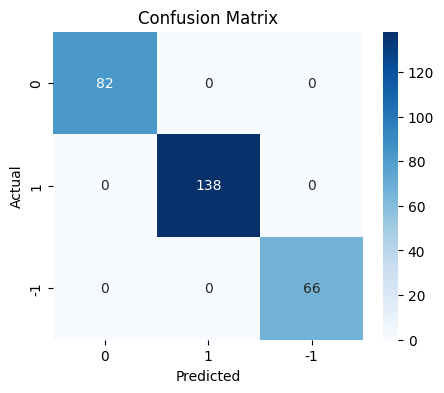

In [ ]:
plot_confusion_matrix(base_wv,X_train_wv,y_train)

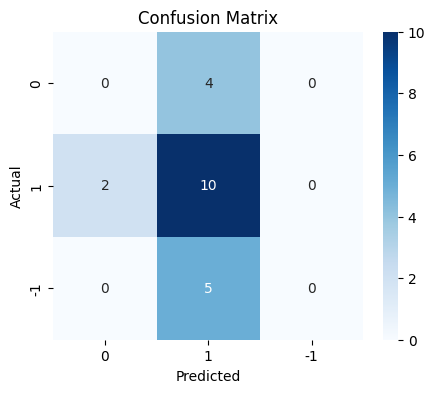

In [ ]:
plot_confusion_matrix(base_wv,X_val_wv,y_val)

In [ ]:
#Calculating different metrics on training data
base_train_wv = model_performance_classification_sklearn(base_wv,X_train_wv,y_train)
print("Training performance:\n", base_train_wv)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
# Calculating different metrics on validation data
base_val_wv = model_performance_classification_sklearn(base_wv,X_val_wv,y_val)
print("Validation performance:\n", base_val_wv)

Validation performance:
    Accuracy   Recall  Precision        F1
0   0.47619  0.47619   0.300752  0.368664


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Base Model -  GloVe with Random Forest Classifier

In [ ]:
#Uncomment only one of the snippets related to fitting the model to the data

#base_wv = GradientBoostingClassifier(random_state = 42)
#base_wv = DecisionTreeClassifier(random_state=42)

base_wv = RandomForestClassifier(random_state=42)
# Fitting on train data
base_wv.fit(X_train_gl, y_train)

RandomForestClassifier(random_state=42)

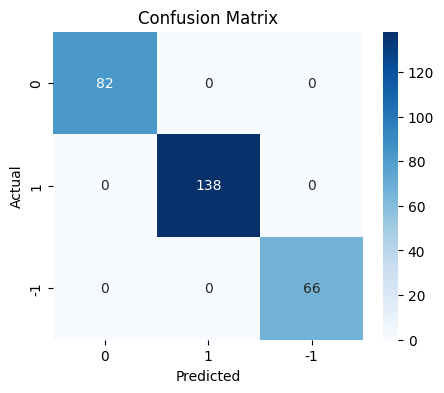

In [ ]:
plot_confusion_matrix(base_wv,X_train_gl,y_train)

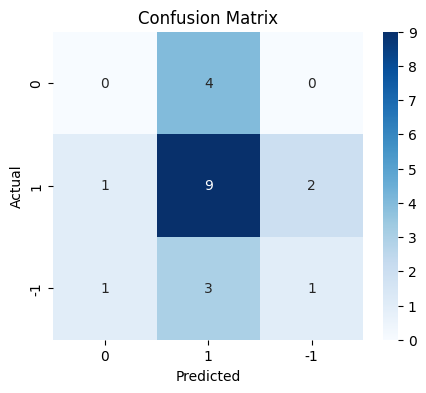

In [ ]:
plot_confusion_matrix(base_wv,X_val_gl,y_val)

In [ ]:
base_train_gl = model_performance_classification_sklearn(base_wv,X_train_gl,y_train)
print("Training performance:\n", base_train_gl)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
base_val_gl = model_performance_classification_sklearn(base_wv,X_val_gl,y_val)
print("Validation performance:\n", base_val_gl)

Validation performance:
    Accuracy   Recall  Precision        F1
0   0.47619  0.47619   0.400794  0.426871


### Base Model - Sentence Transformer with Random Forest Classifier

In [ ]:
# Building the model

#Uncomment only one of the snippets related to fitting the model to the data

#base_wv = GradientBoostingClassifier(random_state = 42)
base_wv = RandomForestClassifier(random_state=42)
#base_wv = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_wv.fit(X_train_st, y_train)

RandomForestClassifier(random_state=42)

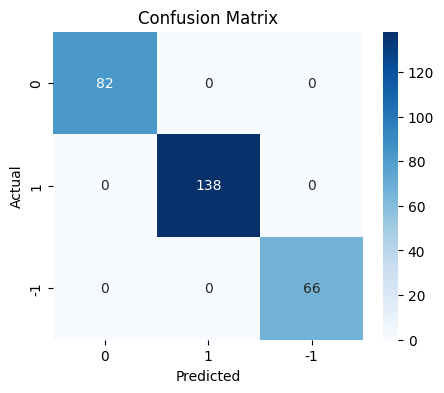

In [ ]:
plot_confusion_matrix(base_wv,X_train_st,y_train)

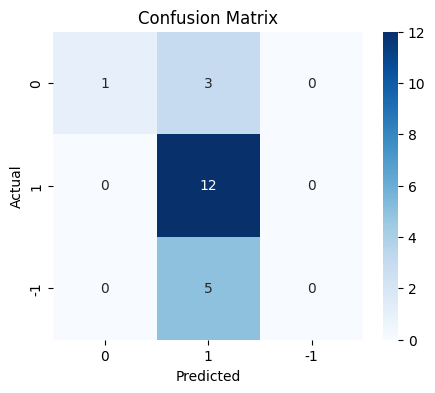

In [ ]:
plot_confusion_matrix(base_wv,X_val_st,y_val)

In [ ]:
base_train_st = model_performance_classification_sklearn(base_wv,X_train_st,y_train)
print("Training performance:\n", base_train_st)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
base_val_st = model_performance_classification_sklearn(base_wv,X_val_st,y_val)
print("Validation performance:\n", base_val_st)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.619048  0.619048   0.533333  0.504762


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Tuned Model - Word2Vec with Random Forest Classifier

In [ ]:
start = time.time()

# Choose the type of classifier.

#Uncomment only one of the snippets corrrsponding to the base model trained previously

#tuned_wv = GradientBoostingClassifier(random_state = 42)
tuned_wv = RandomForestClassifier(random_state=42)
#tuned_wv = DecisionTreeClassifier(random_state=42)


parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_wv, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_wv = grid_obj.best_estimator_

Time taken  181.53434371948242


In [ ]:
# Fit the best algorithm to the data.
tuned_wv.fit(X_train_wv, y_train)

RandomForestClassifier(max_depth=5, max_features=0.4, min_samples_split=5,
                       random_state=42)

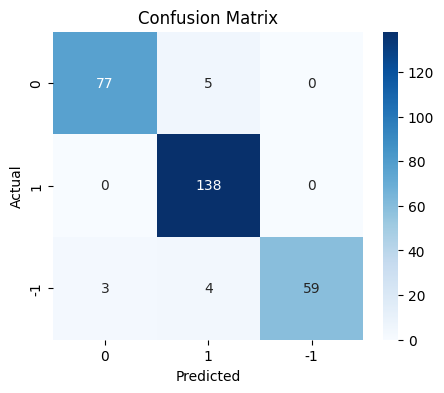

In [ ]:
plot_confusion_matrix(tuned_wv,X_train_wv,y_train)

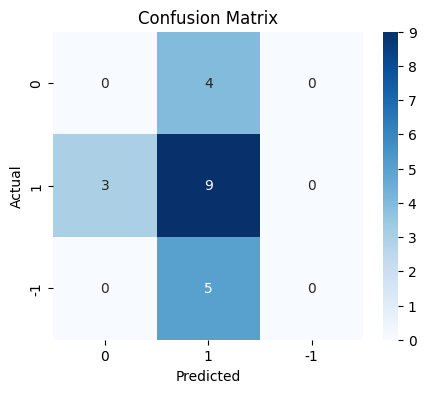

In [ ]:
plot_confusion_matrix(tuned_wv,X_val_wv,y_val)

In [ ]:
tuned_train_wv = model_performance_classification_sklearn(tuned_wv,X_train_wv,y_train)
print("Training performance:\n", tuned_train_wv)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.958042  0.958042   0.959706  0.957681


In [ ]:
tuned_val_wv = model_performance_classification_sklearn(tuned_wv,X_val_wv,y_val)
print("Validation performance:\n", tuned_val_wv)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.428571  0.428571   0.285714  0.342857


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Tuned Model - GloVe with Random Forest Classifier

In [ ]:
start = time.time()

#Uncomment only one of the snippets corrrsponding to the base model trained previously

#tuned_wv = GradientBoostingClassifier(random_state = 42)
tuned_wv = RandomForestClassifier(random_state=42)
#tuned_wv = DecisionTreeClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1) #Complete the code to pass the chosen model
grid_obj = grid_obj.fit(X_train_gl, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_gl = grid_obj.best_estimator_

Time taken  102.45176076889038


In [ ]:
# Fit the best algorithm to the data.
tuned_gl.fit(X_train_gl, y_train)

RandomForestClassifier(max_depth=6, max_features=0.2, min_samples_split=7,
                       random_state=42)

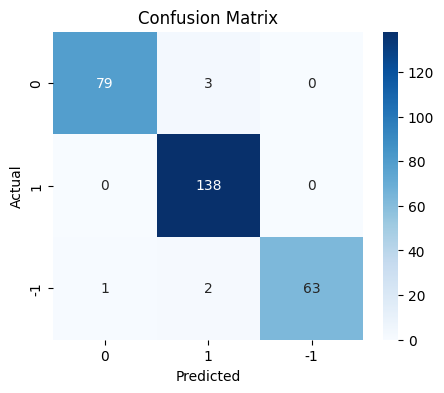

In [ ]:
plot_confusion_matrix(tuned_gl,X_train_gl,y_train)

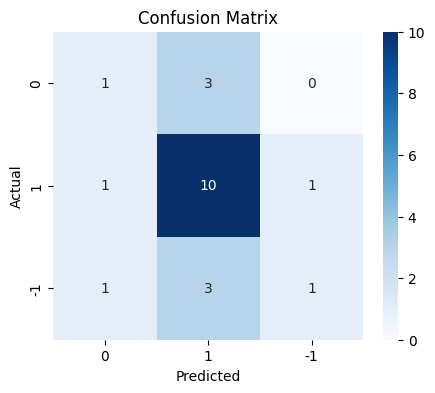

In [ ]:
plot_confusion_matrix(tuned_gl,X_val_gl,y_val)

In [ ]:
tuned_train_gl = model_performance_classification_sklearn(tuned_gl,X_train_gl,y_train)
print("Training performance:\n", tuned_train_gl)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.979021  0.979021   0.979545  0.978968


In [ ]:
tuned_val_gl = model_performance_classification_sklearn(tuned_gl,X_val_gl,y_val)
print("Validation performance:\n", tuned_val_gl)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.571429  0.571429   0.539683  0.530612


### Tuned Model - Sentence Transformer with Random Forest Classifier

In [ ]:
start = time.time()

# Choose the type of classifier.

#Uncomment only one of the snippets corrrsponding to the base model trained previously

#tuned_wv = GradientBoostingClassifier(random_state = 42)
tuned_wv = RandomForestClassifier(random_state=42)
#tuned_wv = DecisionTreeClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1) #Complete the code to pass the chosen model
grid_obj = grid_obj.fit(X_train_st, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_st = grid_obj.best_estimator_

Time taken  201.39453601837158


In [ ]:
tuned_st.fit(X_train_st, y_train)

RandomForestClassifier(max_depth=6, max_features=0.2, min_samples_split=11,
                       random_state=42)

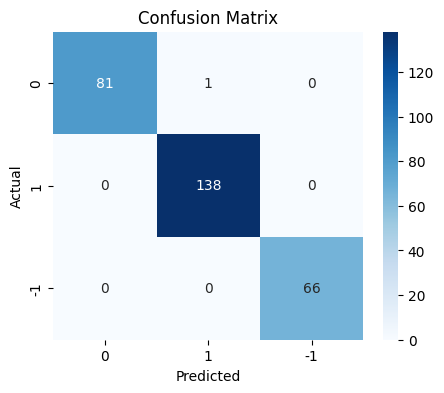

In [ ]:
plot_confusion_matrix(tuned_st,X_train_st,y_train)

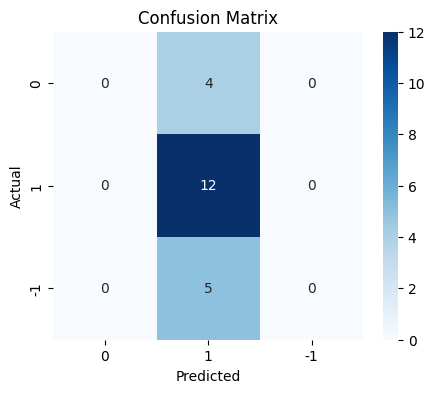

In [ ]:
plot_confusion_matrix(tuned_st,X_val_st,y_val)

In [ ]:
tuned_train_st = model_performance_classification_sklearn(tuned_st,X_train_st,y_train)
print("Training performance:\n", tuned_train_st)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.996503  0.996503   0.996529  0.996499


In [ ]:
tuned_val_st = model_performance_classification_sklearn(tuned_st,X_val_st,y_val)
print("Validation performance:\n", tuned_val_st)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.571429  0.571429   0.326531  0.415584


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Base Model - Word2Vec with Gradient Boosting Classifier

In [ ]:
# Building the model

#Uncomment only one of the snippets related to fitting the model to the data

base_wv_gb = GradientBoostingClassifier(random_state = 42)
#base_wv = RandomForestClassifier(random_state=42)
#base_wv = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_wv_gb.fit(X_train_wv, y_train)

GradientBoostingClassifier(random_state=42)

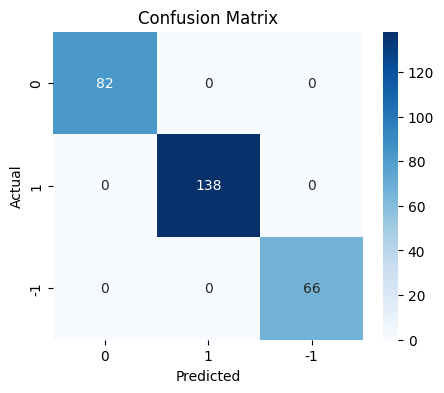

In [ ]:
plot_confusion_matrix(base_wv_gb,X_train_wv,y_train)

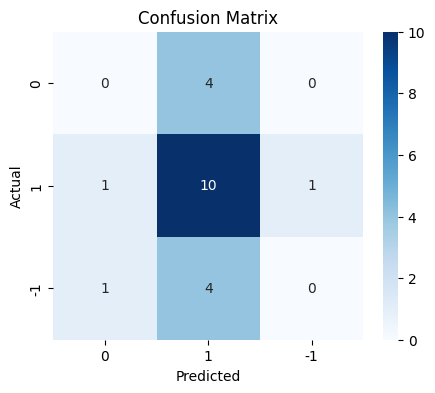

In [ ]:
plot_confusion_matrix(base_wv_gb,X_val_wv,y_val)

In [ ]:
base_train_wv_gb = model_performance_classification_sklearn(base_wv_gb,X_train_wv,y_train)
print("Training performance:\n", base_train_wv_gb)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
base_val_wv_gb = model_performance_classification_sklearn(base_wv_gb,X_val_wv,y_val)
print("Validation performance:\n", base_val_wv_gb)

Validation performance:
    Accuracy   Recall  Precision        F1
0   0.47619  0.47619    0.31746  0.380952


### Base Model - GloVe with Gradient Boosting Classifier

In [ ]:
#Building the model

#Uncomment only one of the snippets related to fitting the model to the data

base_wv_gb = GradientBoostingClassifier(random_state = 42)
#base_wv = RandomForestClassifier(random_state=42)
#base_wv = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_wv_gb.fit(X_train_gl, y_train)

GradientBoostingClassifier(random_state=42)

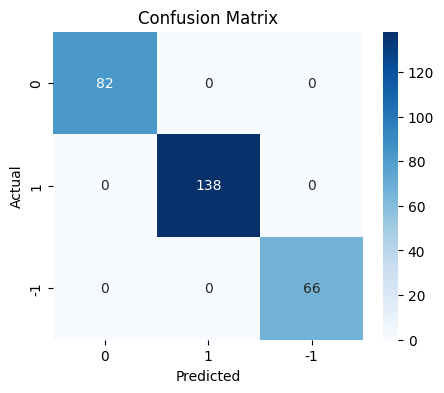

In [ ]:
plot_confusion_matrix(base_wv_gb,X_train_gl,y_train)

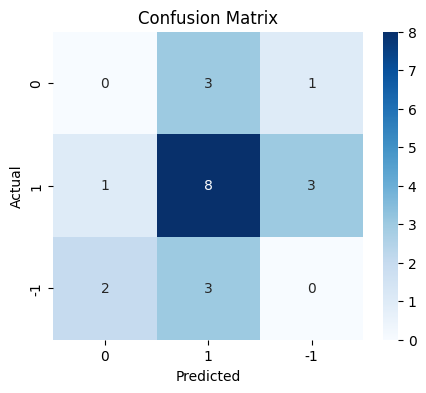

In [ ]:
plot_confusion_matrix(base_wv_gb,X_val_gl,y_val)

In [ ]:
base_train_gl_gb = model_performance_classification_sklearn(base_wv_gb,X_train_gl,y_train)
print("Training performance:\n", base_train_gl_gb)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
base_val_gl_gb = model_performance_classification_sklearn(base_wv_gb,X_val_gl,y_val)
print("Validation performance:\n", base_val_gl_gb)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.380952  0.380952   0.326531  0.351648


### Base Model - Sentence Transformer with Gradient Boosting Classifier

In [ ]:
# Building the model

#Uncomment only one of the snippets related to fitting the model to the data

base_wv_gb = GradientBoostingClassifier(random_state = 42)
#base_wv = RandomForestClassifier(random_state=42)
#base_wv = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_wv_gb.fit(X_train_st, y_train)

GradientBoostingClassifier(random_state=42)

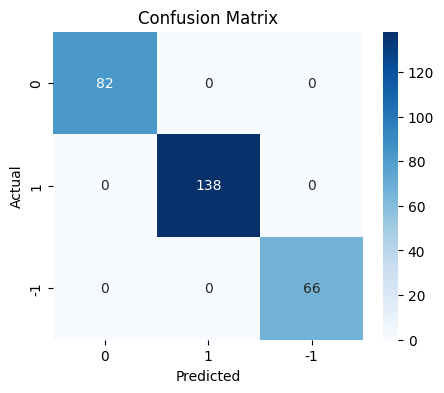

In [ ]:
plot_confusion_matrix(base_wv_gb,X_train_st,y_train)

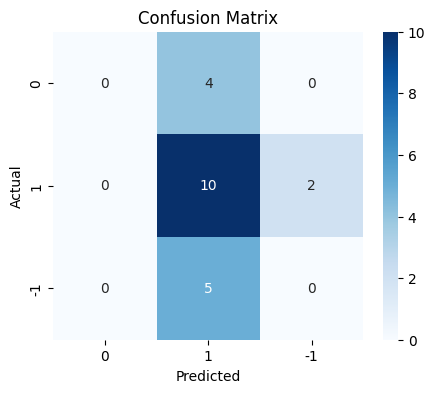

In [ ]:
plot_confusion_matrix(base_wv_gb,X_val_st,y_val)

In [ ]:
base_train_st_gb = model_performance_classification_sklearn(base_wv_gb,X_train_st,y_train)
print("Training performance:\n", base_train_st_gb)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
base_val_st_gb = model_performance_classification_sklearn(base_wv_gb,X_val_st,y_val)
print("Validation performance:\n", base_val_st_gb)

Validation performance:
    Accuracy   Recall  Precision        F1
0   0.47619  0.47619   0.300752  0.368664


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Tuned Model - Word2Vec with Gradient Boosting Classifier

In [ ]:
start = time.time()

# Choose the type of classifier.

#Uncomment only one of the snippets corrrsponding to the base model trained previously

tuned_wv = GradientBoostingClassifier(random_state = 42)
#tuned_wv = RandomForestClassifier(random_state=42)
#tuned_wv = DecisionTreeClassifier(random_state=42)


parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_wv, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_wv_gb = grid_obj.best_estimator_

Time taken  686.4688844680786


In [ ]:
# Fit the best algorithm to the data.
tuned_wv_gb.fit(X_train_wv, y_train)

GradientBoostingClassifier(max_depth=6, max_features='sqrt',
                           min_samples_split=9, random_state=42)

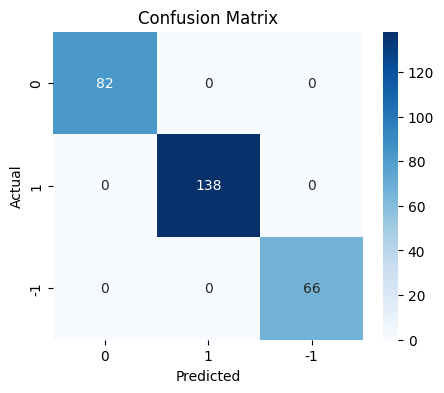

In [ ]:
plot_confusion_matrix(tuned_wv_gb,X_train_wv,y_train)

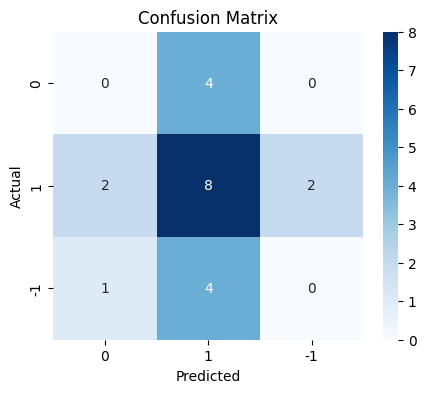

In [ ]:
plot_confusion_matrix(tuned_wv_gb,X_val_wv,y_val)

In [ ]:
tuned_wv_gb_train = model_performance_classification_sklearn(tuned_wv_gb,X_train_wv,y_train)
print("Training performance:\n", tuned_wv_gb_train)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
tuned_wv_gb_val = model_performance_classification_sklearn(tuned_wv_gb,X_val_wv,y_val)
print("Validation performance:\n", tuned_wv_gb_val)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.380952  0.380952   0.285714  0.326531


### Tuned Model - GloVe with Gradient Boosting Classifier

In [ ]:
start = time.time()

#Uncomment only one of the snippets corrrsponding to the base model trained previously

tuned_wv = GradientBoostingClassifier(random_state = 42)
#tuned_wv = RandomForestClassifier(random_state=42)
#tuned_wv = DecisionTreeClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1) #Complete the code to pass the chosen model
grid_obj = grid_obj.fit(X_train_gl, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_gl_gb = grid_obj.best_estimator_

Time taken  355.44801688194275


In [ ]:
tuned_gl_gb.fit(X_train_gl, y_train)

GradientBoostingClassifier(max_features='log2', min_samples_split=9,
                           random_state=42)

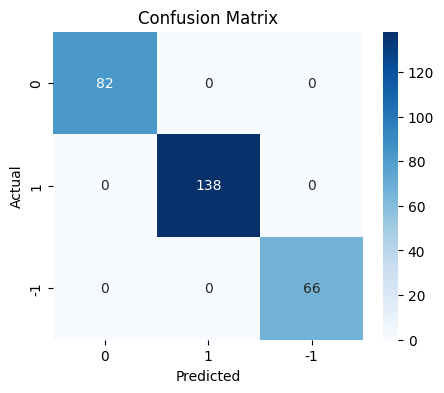

In [ ]:
plot_confusion_matrix(tuned_gl_gb,X_train_gl,y_train)

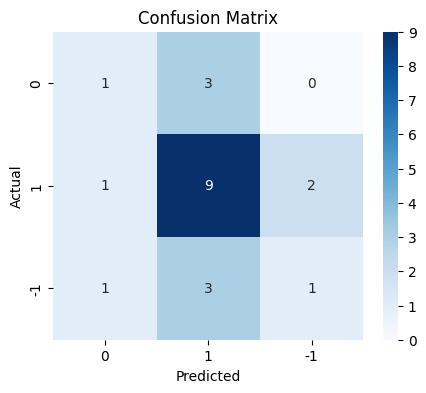

In [ ]:
plot_confusion_matrix(tuned_gl_gb,X_val_gl,y_val)

In [ ]:
tuned_gl_gb_train = model_performance_classification_sklearn(tuned_gl_gb,X_train_gl,y_train)
print("Training performance:\n", tuned_gl_gb_train)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
tuned_gl_gb_val = model_performance_classification_sklearn(tuned_gl_gb,X_val_gl,y_val)
print("Validation performance:\n", tuned_gl_gb_val)

Validation performance:
    Accuracy   Recall  Precision        F1
0   0.52381  0.52381   0.485714  0.494898


### Tuned Model - Sentence Transformer with Gradient Boosting Classifier

In [ ]:
start = time.time()

# Choose the type of classifier.

#Uncomment only one of the snippets corrrsponding to the base model trained previously

tuned_wv = GradientBoostingClassifier(random_state = 42)
#tuned_wv = RandomForestClassifier(random_state=42)
#tuned_wv = DecisionTreeClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1) #Complete the code to pass the chosen model
grid_obj = grid_obj.fit(X_train_st, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_st_gb = grid_obj.best_estimator_

Time taken  817.0889036655426


In [ ]:
# Fit the best algorithm to the data.
tuned_st_gb.fit(X_train_st, y_train)

GradientBoostingClassifier(max_features='sqrt', min_samples_split=11,
                           random_state=42)

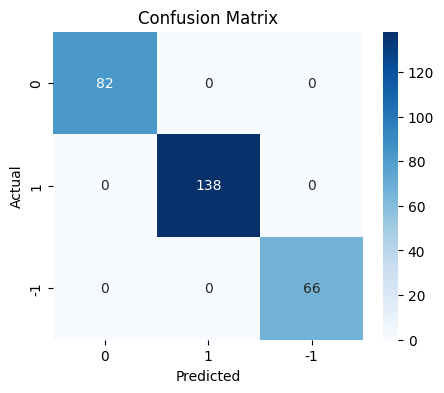

In [ ]:
plot_confusion_matrix(tuned_st_gb,X_train_st,y_train)

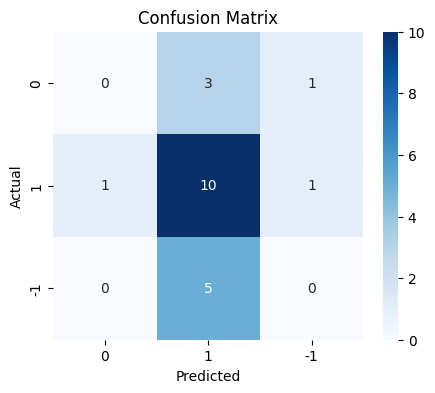

In [ ]:
plot_confusion_matrix(tuned_st_gb,X_val_st,y_val)

In [ ]:
tuned_st_gb_train = model_performance_classification_sklearn(tuned_st_gb,X_train_st,y_train)
print("Training performance:\n", tuned_st_gb_train)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
tuned_st_gb_val = model_performance_classification_sklearn(tuned_st_gb,X_val_st,y_val)
print("Validation performance:\n", tuned_st_gb_val)

Validation performance:
    Accuracy   Recall  Precision        F1
0   0.47619  0.47619    0.31746  0.380952


### Base Model - Word2Vec with Decision Tree Classifier

In [ ]:
# Building the model

#Uncomment only one of the snippets related to fitting the model to the data

#base_wv = GradientBoostingClassifier(random_state = 42)
#base_wv = RandomForestClassifier(random_state=42)
base_wv_dt = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_wv_dt.fit(X_train_wv, y_train)

DecisionTreeClassifier(random_state=42)

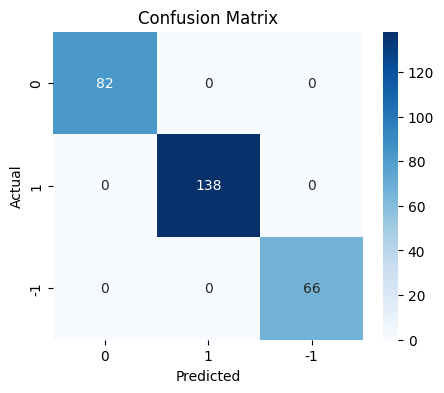

In [ ]:
plot_confusion_matrix(base_wv_dt,X_train_wv,y_train)

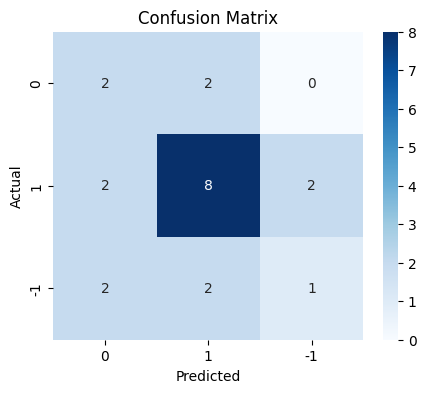

In [ ]:
plot_confusion_matrix(base_wv_dt,X_val_wv,y_val)

In [ ]:
base_wv_train_dt = model_performance_classification_sklearn(base_wv_dt,X_train_wv,y_train)
print("Training performance:\n", base_wv_train_dt)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
base_wv_val_dt = model_performance_classification_sklearn(base_wv_dt,X_val_wv,y_val)
print("Validation performance:\n", base_wv_val_dt)

Validation performance:
    Accuracy   Recall  Precision        F1
0   0.52381  0.52381    0.52381  0.516667


### Base Model - GloVe with Decision Tree Classifier

In [ ]:
# Building the model

#Uncomment only one of the snippets related to fitting the model to the data

#base_wv = GradientBoostingClassifier(random_state = 42)
#base_wv = RandomForestClassifier(random_state=42)
base_wv_dt = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_wv_dt.fit(X_train_gl, y_train)

DecisionTreeClassifier(random_state=42)

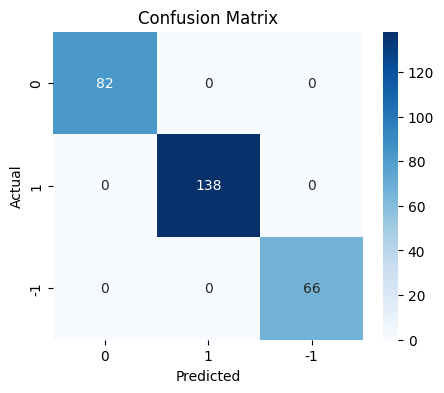

In [ ]:
plot_confusion_matrix(base_wv_dt,X_train_gl,y_train)

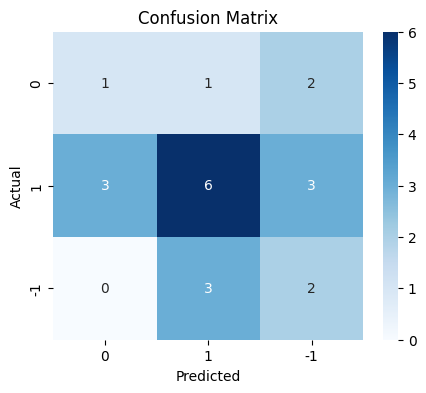

In [ ]:
plot_confusion_matrix(base_wv_dt,X_val_gl,y_val)

In [ ]:
base_gl_train_dt = model_performance_classification_sklearn(base_wv_dt,X_train_gl,y_train)
print("Training performance:\n", base_gl_train_dt)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
base_gl_val_dt = model_performance_classification_sklearn(base_wv_dt,X_val_gl,y_val)
print("Validation performance:\n", base_gl_val_dt)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.428571  0.428571   0.458503  0.438672


### Base Model - Sentence Transformer with Decision Tree Classifier

In [ ]:
# Building the model

#Uncomment only one of the snippets related to fitting the model to the data

#base_wv = GradientBoostingClassifier(random_state = 42)
#base_wv = RandomForestClassifier(random_state=42)
base_wv_dt = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_wv_dt.fit(X_train_st, y_train)

DecisionTreeClassifier(random_state=42)

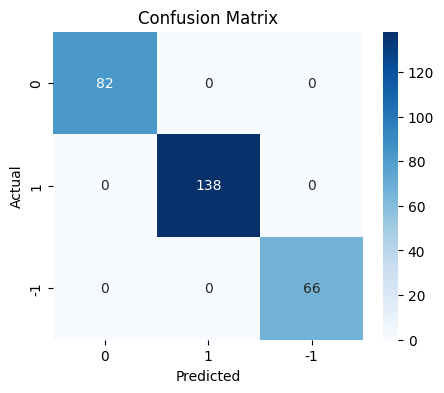

In [ ]:
plot_confusion_matrix(base_wv_dt,X_train_st,y_train)

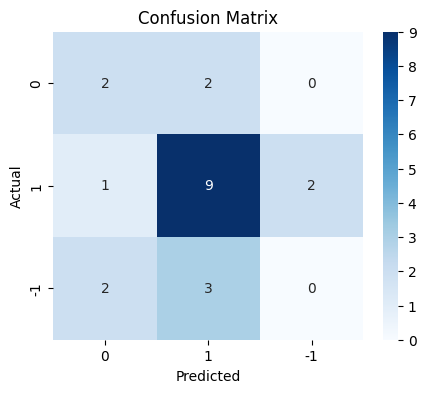

In [ ]:
plot_confusion_matrix(base_wv_dt,X_val_st,y_val)

In [ ]:
base_st_train_dt = model_performance_classification_sklearn(base_wv_dt,X_train_st,y_train)
print("Training performance:\n", base_st_train_dt)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
base_st_val_dt = model_performance_classification_sklearn(base_wv_dt,X_val_st,y_val)
print("Validation performance:\n", base_st_val_dt)

Validation performance:
    Accuracy   Recall  Precision       F1
0   0.52381  0.52381   0.443537  0.48026


### Tuned Model - Word2Vec with Decision Tree Classifier

In [ ]:
start = time.time()

# Choose the type of classifier.

#Uncomment only one of the snippets corrrsponding to the base model trained previously

#tuned_wv = GradientBoostingClassifier(random_state = 42)
#tuned_wv = RandomForestClassifier(random_state=42)
tuned_wv = DecisionTreeClassifier(random_state=42)


parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_wv, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_wv_dt = grid_obj.best_estimator_

Time taken  6.892047166824341


In [ ]:
# Fit the best algorithm to the data.
tuned_wv_dt.fit(X_train_wv, y_train)

DecisionTreeClassifier(max_depth=5, max_features=0.2, min_samples_split=11,
                       random_state=42)

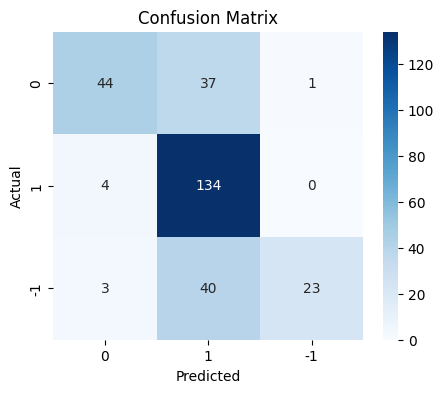

In [ ]:
plot_confusion_matrix(tuned_wv_dt,X_train_wv,y_train)

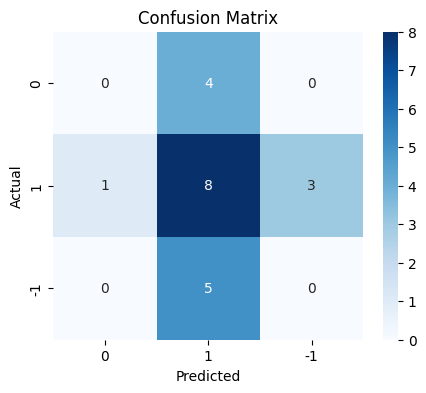

In [ ]:
plot_confusion_matrix(tuned_wv_dt,X_val_wv,y_val)

In [ ]:
tuned_wv_dt_train = model_performance_classification_sklearn(tuned_wv_dt,X_train_wv,y_train)
print("Training performance:\n", tuned_wv_dt_train)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.702797  0.702797   0.774947  0.678183


In [ ]:
tuned_wv_dt_val = model_performance_classification_sklearn(tuned_wv_dt,X_val_wv,y_val)
print("Validation performance:\n", tuned_wv_dt_val)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.380952  0.380952   0.268908  0.315271


### Tuned Model - GloVe with Decision Tree Classifier

In [ ]:
start = time.time()

#Uncomment only one of the snippets corrrsponding to the base model trained previously

#tuned_wv = GradientBoostingClassifier(random_state = 42)
#tuned_wv = RandomForestClassifier(random_state=42)
tuned_wv = DecisionTreeClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1) #Complete the code to pass the chosen model
grid_obj = grid_obj.fit(X_train_gl, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_gl_dt = grid_obj.best_estimator_

Time taken  2.9943759441375732


In [ ]:
# Fit the best algorithm to the data.
tuned_gl_dt.fit(X_train_gl, y_train)

DecisionTreeClassifier(max_depth=4, max_features='log2', min_samples_split=5,
                       random_state=42)

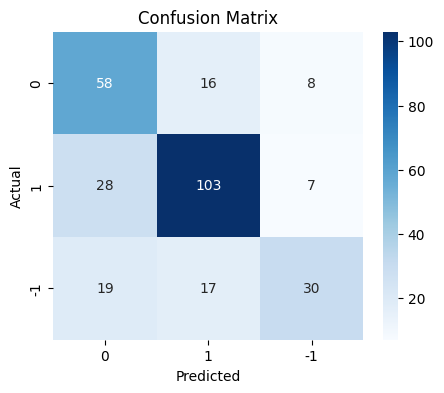

In [ ]:
plot_confusion_matrix(tuned_gl_dt,X_train_gl,y_train)

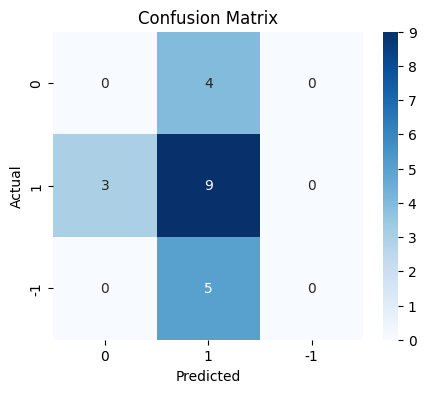

In [ ]:
plot_confusion_matrix(tuned_gl_dt,X_val_gl,y_val)

In [ ]:
tuned_gl_dt_train = model_performance_classification_sklearn(tuned_gl_dt,X_train_gl,y_train)
print("Training performance:\n", tuned_gl_dt_train)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.667832  0.667832   0.677657  0.665363


In [ ]:
tuned_gl_dt_val = model_performance_classification_sklearn(tuned_gl_dt,X_val_gl,y_val)
print("Validation performance:\n", tuned_gl_dt_val)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.428571  0.428571   0.285714  0.342857


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Tuned Model - Sentence Transformer with Decision Tree Classifier

In [ ]:
start = time.time()

# Choose the type of classifier.

#Uncomment only one of the snippets corrrsponding to the base model trained previously

#tuned_wv = GradientBoostingClassifier(random_state = 42)
#tuned_wv = RandomForestClassifier(random_state=42)
tuned_wv = DecisionTreeClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1) #Complete the code to pass the chosen model
grid_obj = grid_obj.fit(X_train_st, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_st_dt = grid_obj.best_estimator_

Time taken  3.389448404312134


In [ ]:
tuned_st_dt.fit(X_train_st, y_train)

DecisionTreeClassifier(max_depth=6, max_features='log2', min_samples_split=7,
                       random_state=42)

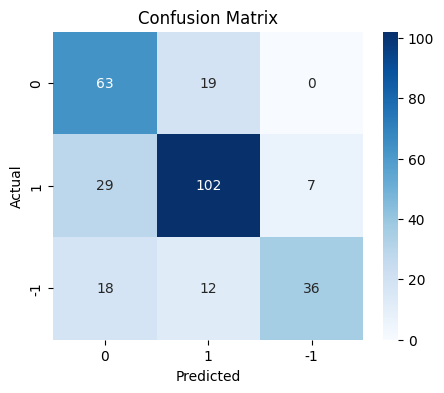

In [ ]:
plot_confusion_matrix(tuned_st_dt,X_train_st,y_train)

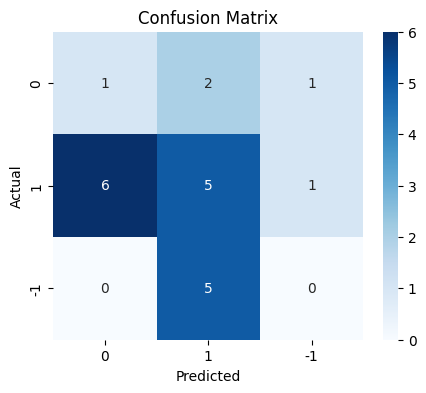

In [ ]:
plot_confusion_matrix(tuned_st_dt,X_val_st,y_val)

In [ ]:
tuned_st_dt_train = model_performance_classification_sklearn(tuned_st_dt,X_train_st,y_train)
print("Training performance:\n", tuned_st_dt_train)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.702797  0.702797   0.727462  0.703814


In [ ]:
tuned_st_dt_val = model_performance_classification_sklearn(tuned_st_dt,X_val_st,y_val)
print("Validation performance:\n", tuned_st_dt_val)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.285714  0.285714   0.265306  0.272727


## **Model Performance Summary and Final Model Selection**

In [ ]:
models_train_comp_df = pd.concat(
    [base_train_wv.T,
     base_train_gl.T,
     base_train_st.T,
     tuned_train_wv.T,
     tuned_train_gl.T,
     tuned_train_st.T,
    ],axis=1
)

models_train_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Training performance comparison using Random Forest Classifier:")
models_train_comp_df

Training performance comparison using Random Forest Classifier:


,Base Model (Word2Vec),Base Model (GloVe),Base Model (Sentence Transformer),Tuned Model (Word2Vec),Tuned Model (GloVe),Tuned Model (Sentence Transformer)
Accuracy,1.0,1.0,1.0,0.958042,0.979021,0.996503
Recall,1.0,1.0,1.0,0.958042,0.979021,0.996503
Precision,1.0,1.0,1.0,0.959706,0.979545,0.996529
F1,1.0,1.0,1.0,0.957681,0.978968,0.996499


In [ ]:
models_train_comp_df_gb = pd.concat(
    [base_train_wv_gb.T,
     base_train_gl_gb.T,
     base_train_st_gb.T,
     tuned_wv_gb_train.T,
     tuned_gl_gb_train.T,
     tuned_st_gb_train.T],axis=1
)

models_train_comp_df_gb.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)"]

print("Training performance comparison using Gradient Boosting Classifier:")
models_train_comp_df_gb

Training performance comparison using Gradient Boosting Classifier:


,Base Model (Word2Vec),Base Model (GloVe),Base Model (Sentence Transformer),Tuned Model (Word2Vec),Tuned Model (GloVe),Tuned Model (Sentence Transformer)
Accuracy,1.0,1.0,1.0,1.0,1.0,1.0
Recall,1.0,1.0,1.0,1.0,1.0,1.0
Precision,1.0,1.0,1.0,1.0,1.0,1.0
F1,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
models_train_comp_df_dt = pd.concat(
    [base_wv_train_dt.T,
     base_gl_train_dt.T,
     base_st_train_dt.T,
     tuned_wv_dt_train.T,
     tuned_gl_dt_train.T,
     tuned_st_dt_train.T],axis=1)

models_train_comp_df_dt.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)"]


print("Training performance comparison using Decision Tree Classifier:")
models_train_comp_df_dt

Training performance comparison using Decision Tree Classifier:


,Base Model (Word2Vec),Base Model (GloVe),Base Model (Sentence Transformer),Tuned Model (Word2Vec),Tuned Model (GloVe),Tuned Model (Sentence Transformer)
Accuracy,1.0,1.0,1.0,0.702797,0.667832,0.702797
Recall,1.0,1.0,1.0,0.702797,0.667832,0.702797
Precision,1.0,1.0,1.0,0.774947,0.677657,0.727462
F1,1.0,1.0,1.0,0.678183,0.665363,0.703814


In [ ]:
#validation performance comparison

models_val_comp_df = pd.concat(
    [base_val_wv.T,
     base_val_gl.T,
     base_val_st.T,
     tuned_val_wv.T,
     tuned_val_gl.T,
     tuned_val_st.T,
     ],axis=1
)

models_val_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Validation performance comparison using Random Forest Classifier:")
models_val_comp_df

Validation performance comparison using Random Forest Classifier:


,Base Model (Word2Vec),Base Model (GloVe),Base Model (Sentence Transformer),Tuned Model (Word2Vec),Tuned Model (GloVe),Tuned Model (Sentence Transformer)
Accuracy,0.476190,0.476190,0.619048,0.428571,0.571429,0.571429
Recall,0.476190,0.476190,0.619048,0.428571,0.571429,0.571429
Precision,0.300752,0.400794,0.533333,0.285714,0.539683,0.326531
F1,0.368664,0.426871,0.504762,0.342857,0.530612,0.415584


In [ ]:
models_val_comp_df_gb = pd.concat(
    [base_val_wv_gb.T,
     base_val_gl_gb.T,
     base_val_st_gb.T,
     tuned_wv_gb_val.T,
     tuned_gl_gb_val.T,
     tuned_st_gb_val.T],axis=1
)

models_val_comp_df_gb.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)"]

print("Validation performance comparison using Gradient Boosting Classifier:")
models_val_comp_df_gb

Validation performance comparison using Gradient Boosting Classifier:


,Base Model (Word2Vec),Base Model (GloVe),Base Model (Sentence Transformer),Tuned Model (Word2Vec),Tuned Model (GloVe),Tuned Model (Sentence Transformer)
Accuracy,0.476190,0.380952,0.476190,0.380952,0.523810,0.476190
Recall,0.476190,0.380952,0.476190,0.380952,0.523810,0.476190
Precision,0.317460,0.326531,0.300752,0.285714,0.485714,0.317460
F1,0.380952,0.351648,0.368664,0.326531,0.494898,0.380952


In [ ]:
models_train_comp_df_dt = pd.concat(
    [base_wv_val_dt.T,
     base_gl_val_dt.T,
     base_st_val_dt.T,
     tuned_wv_dt_val.T,
     tuned_gl_dt_val.T,
     tuned_st_dt_val.T],axis=1
    )

models_train_comp_df_dt.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)"]


print("Validation performance comparison using Decision Tree Classifier:")
models_train_comp_df_dt

Validation performance comparison using Decision Tree Classifier:


,Base Model (Word2Vec),Base Model (GloVe),Base Model (Sentence Transformer),Tuned Model (Word2Vec),Tuned Model (GloVe),Tuned Model (Sentence Transformer)
Accuracy,0.523810,0.428571,0.523810,0.380952,0.428571,0.285714
Recall,0.523810,0.428571,0.523810,0.380952,0.428571,0.285714
Precision,0.523810,0.458503,0.443537,0.268908,0.285714,0.265306
F1,0.516667,0.438672,0.480260,0.315271,0.342857,0.272727


### Model Performance Check on Test Data

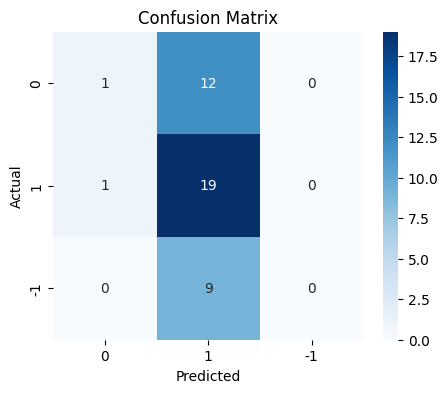

In [ ]:
plot_confusion_matrix(tuned_st,X_test_st,y_test)

In [ ]:
#Calculating different metrics on training data
final_model_test = model_performance_classification_sklearn(tuned_st,X_test_st,y_test) #Complete the code to compute the final model's performance for the test data
print("Test performance for the final model:\n",final_model_test)

Test performance for the final model:
    Accuracy    Recall  Precision        F1
0  0.996503  0.996503   0.996529  0.996499


## **Weekly News Summarization**

**Important Note**: It is recommended to run this section of the project independently from the previous sections in order to avoid runtime crashes due to RAM overload.

#### Installing and Importing the necessary libraries

In [ ]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python -q

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python -q
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 MB 8.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × Building wheel for llama-cpp-python (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for llama-cpp-python
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (llama-cpp-python)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

#### Loading the data

In [ ]:
stock_news = pd.read_csv("/content/drive/MyDrive/stock_news.csv")

In [ ]:
data = stock_news.copy()

#### Loading the model

In [ ]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"


model_path = hf_hub_download(
    repo_id=model_name_or_path, # Complete the code to mention the repo_id
    filename=model_basename # Complete the code to mention the filename
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [ ]:
#uncomment the below snippet of code if the runtime is connected to GPU.
llm = Llama(
    model_path=model_path, # Path to the model
    n_gpu_layers=100, #Number of layers transferred to GPU
    n_ctx=4500, #Context window
)

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loade

In [ ]:
# uncomment and run the following code in case GPU is not being used

llm = Llama(
     model_path=model_path,
    n_ctx=4500, # Context window
     n_cores=-2 # Number of CPU cores to use
 )

#### Aggregating the data weekly

In [ ]:
data["Date"] = pd.to_datetime(data['Date'])  # Convert the 'Date' column to datetime format.

In [ ]:
# Group the data by week using the 'Date' column.
weekly_grouped = data.groupby(pd.Grouper(key='Date', freq='W'))

In [ ]:
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


In [ ]:
weekly_grouped

,Date,News
0,2019-01-06,The tech sector experienced a significant dec...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...
2,2019-01-20,The U.S. stock market declined on Monday as c...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...
5,2019-02-10,"The Dow Jones Industrial Average, S&P 500, an..."
6,2019-02-17,"This week, the European Union's second highes..."
7,2019-02-24,This news article discusses progress towards ...
8,2019-03-03,The Dow Jones Industrial Average and other ma...
9,2019-03-10,"Spotify, the world's largest paid music strea..."


In [ ]:
# creating a copy of the data
data_1 = weekly_grouped.copy()

#### Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

  - **Example**: `You are an expert data analyst specializing in news content analysis.`

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

  - **Example**: `Analyze the provided news headline and return the main topics contained within it.`

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

  - **Example**:

```
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.
```

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output

  - **Example**: `Return the output in JSON format with keys as the topic number and values as the actual topic.`

**Full Prompt Example**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Sample Output**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

##### Utility Functions

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

##### Defining the response function

In [ ]:
#Defining the response function
def response_mistral_1(prompt, news):
    model_output = llm(
      f"""
      [INST]
      {prompt}
      News Articles: {news}
      [/INST]
      """,
      max_tokens=1024, #Complete the code to set the maximum number of tokens the model should generate for this task.
      temperature=0.7, #Complete the code to set the value for temperature.
      top_p=0.9, #Complete the code to set the value for top_p
      top_k=50, #Complete the code to set the value for top_k
      echo=False,
    )

    final_output = model_output["choices"][0]["text"]

    return final_output

##### Checking the model output on a sample

**Note**: Use this section to test out the prompt with one instance before using it for the entire weekly data.

In [ ]:
news = data_1.loc[0, 'News']

In [ ]:
print(len(news.split(' ')))
news

2611


' The tech sector experienced a significant decline in the aftermarket following Apple\'s Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple\'s downward revision of its revenue expectations for the quarter, previously announced in January. ||  Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple\'s stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10 ||  Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple\'s shares fell 8.5% in post market trading, while Asian suppliers like Hon ||  This news article reports that yields o

In [ ]:
prompt = ''' 1. Process each news headline, which is separated by ' || '.
            2. Assess whether the sentiment is optimistic (positive) or pessimistic (negative) based on key indicators.
            3. Extract and categorize each headline according to its sentiment (Positive or Negative) and generate a brief summary.
            4.Organize the results by grouping them into weekly summaries, including the original news headlines and providing a count of positive (1) and negative (-1) sentiments.
            5.Present the final output in JSON format.'''

In [ ]:
summary = response_mistral_1(prompt, news)
print(summary)

llama_perf_context_print:        load time = 1887530.54 ms
llama_perf_context_print: prompt eval time = 1887529.91 ms /  3887 tokens (  485.60 ms per token,     2.06 tokens per second)
llama_perf_context_print:        eval time =  628776.36 ms /   624 runs   ( 1007.65 ms per token,     0.99 tokens per second)
llama_perf_context_print:       total time = 2516999.82 ms /  4511 tokens


 [
        {
          "headline": "Tech sector experiences significant decline following Apple's Q1 revenue warning",
          "sentiment": "Negative",
          "summary": "Apple's Q1 revenue warning led to a significant decline in the tech sector, with notable suppliers such as Skyworks, Broadcom, Lumentum, Qorvo, and TSMC seeing their stocks drop in response. The announcement caused broader market declines for tech indices such as Nasdaq 10.",
          "weekly_summary": "Week of January 7, 2019: The tech sector experienced significant declines following Apple's Q1 revenue warning, with notable suppliers seeing their stocks drop in response. The announcement caused broader market declines for tech indices such as Nasdaq 10. Count: -1"
        },
        {
          "headline": "Apple cuts fiscal Q1 revenue forecast to $84 billion from earlier estimates",
          "sentiment": "Negative",
          "summary": "Apple cut its fiscal first quarter revenue forecast to $84 billion due 

##### Checking the model output on the weekly data

In [ ]:
data_1['Key Events'] = data_1['News'].progress_apply(lambda x: response_mistral_1(prompt,x))

  0%|          | 0/18 [00:00<?, ?it/s]Llama.generate: 3886 prefix-match hit, remaining 1 prompt tokens to eval
llama_perf_context_print:        load time = 1887530.54 ms
llama_perf_context_print: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =  628304.82 ms /   625 runs   ( 1005.29 ms per token,     0.99 tokens per second)
llama_perf_context_print:       total time =  629004.82 ms /   626 tokens
 11%|█         | 2/18 [10:29<1:23:52, 314.51s/it]Llama.generate: 142 prefix-match hit, remaining 2234 prompt tokens to eval
llama_perf_context_print:        load time = 1887530.54 ms
llama_perf_context_print: prompt eval time = 1039443.36 ms /  2234 tokens (  465.28 ms per token,     2.15 tokens per second)
llama_perf_context_print:        eval time =  954680.16 ms /  1023 runs   (  933.22 ms per token,     1.07 tokens per second)
llama_perf_context_print:       total time = 1995681.57 ms /  3257 to

In [ ]:
data_1["Key Events"].head(5)

##### Formatting the model output

In [ ]:
data_1['model_response_parsed'] = data_1['Key Events'].apply(extract_json_data)
data_1.head()

In [ ]:
model_response_parsed = pd.json_normalize(data_1['model_response_parsed'])
model_response_parsed.head()

In [ ]:
final_output = pd.concat([data_1.reset_index(drop=True),model_response_parsed],axis=1)
final_output.drop(['Key Events','model_response_parsed'], axis=1, inplace=True)
final_output.columns = ['Week End Date', 'News', 'Week Positive Events', 'Week Negative Events']

final_output.head()

## **Conclusions and Recommendations**

- The Tuned Model - Sentence Transformer using Random Forest Classifier was chosen due to its high accuracy and recall. Accuracy was chosen as the model performance metric criteria. This model had around 57% accuracy on the validation set but around 99% accuracy on train and test set.
- A smaller dataset can be used for better results on training and validation sets as all the models have less than 80% F1 score.
- A better model from Hugging Face can be used for text summarization as this model takes a lot of runtime, which may be inefficient for the company.




<font size=6 color='blue'>Power Ahead</font>
___